In [1]:
# Sample Image Predictor Code
# Source:  ChatGPT https://chatgpt.com/c/af239f07-509d-4127-aa2f-e2b25b30cb11
# Input: provide CNN or similar machine learning model function in python that 
# generates a new image based upon 13 uploaded grayscale images showing a time 
# sequential change. The data set is 13 images of a melting ice formation over 
# time, and the output is the time sequential predicted image of what the next 
# ice formation will look like in the next time interval.
# Step 1: Install Required Libraries 
# in bash:  pip install tensorflow matplotlib numpy

### Step 2: Load and Prepare the Data

In [8]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
import os
import requests
from PIL import Image

In [9]:
# Load images (assuming images are named sequentially like 'frame1.png', 'frame2.png', etc.)
image_dir = r"C:\Users\frisb\OneDrive\Desktop\BOOTCAMP WORK\Final Project\ASO_CAMB_ONLY_SAMPLE"

In [ ]:
# First lets try the Image.open function
img = Image.open(r"C:\Users\frisb\OneDrive\Desktop\BOOTCAMP WORK\Final Project\ASO_CAMB_ONLY_SAMPLE\ASO_50M_SWE_USCAMB_1.png")
display(im)
img.size

[<PIL.PngImagePlugin.PngImageFile image mode=RGBA size=821x707>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=821x707>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=821x707>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=821x707>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=821x707>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=821x707>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=821x707>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=821x707>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=821x707>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=821x707>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=821x707>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=821x707>,
 <PIL.PngImagePlugin.PngImageFile image mode=RGBA size=821x707>]

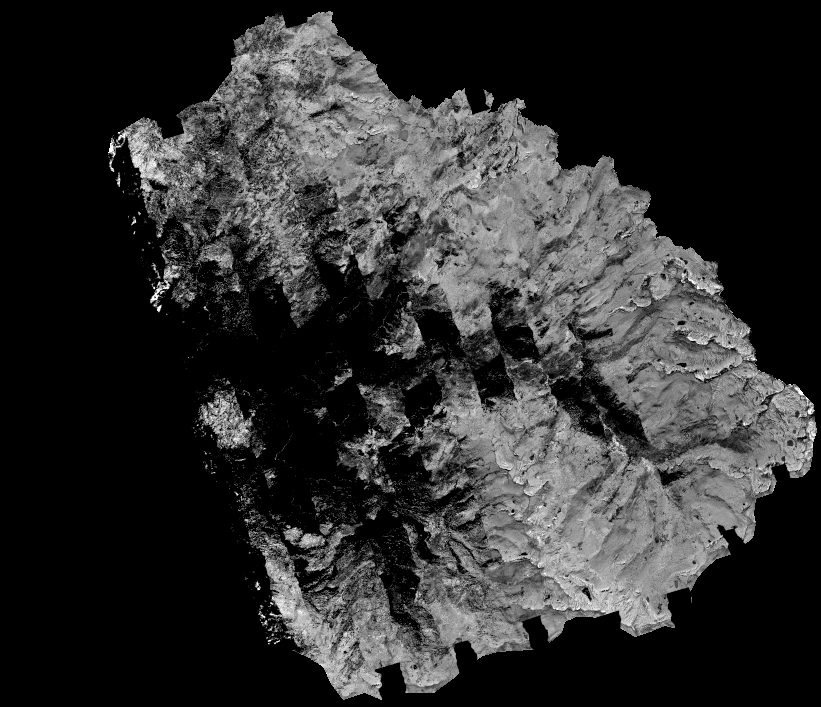

In [34]:
import os
from PIL import Image

# Specify the directory containing the images
image_dir = r"C:\Users\frisb\OneDrive\Desktop\BOOTCAMP WORK\Final Project\ASO_CAMB_ONLY_SAMPLE"

# Supported image formats
supported_formats = (".png")

# Initialize an empty list to store images
image_list = []

# Loop through all files in the directory
for filename in os.listdir(image_dir):
    if filename.lower().endswith(supported_formats):  # Check if the file is an image
        img_path = os.path.join(image_dir, filename)
        img = Image.open(img_path)  # Open the image file
        image_list.append(img)  # Add the image to the list

# Now `image_list` contains all the images loaded from the directory
display(image_list)
#Display first image
image_list[0]

In [5]:
#Set image size
image_size = (821, 707) 

In [35]:
# Lets examine our data numerically.
# This is most easily done by converting the image to a numpy array

# Convert one image to a NumPy array
pixel_values = np.array(image_list[0])

# Display the pixel values
print("Pixel Values:")
print(pixel_values)

Pixel Values:
[[[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 ...

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]

 [[  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]
  ...
  [  0   0   0 255]
  [  0   0   0 255]
  [  0   0   0 255]]]


In [36]:
# Convert all images to floating point numpy arrays
float_images = [np.array(img).astype(np.float32) for img in image_list]

# Display the pixel values of the first image
print("Pixel Values:")
print(float_images[0])

Pixel Values:
[[[  0.   0.   0. 255.]
  [  0.   0.   0. 255.]
  [  0.   0.   0. 255.]
  ...
  [  0.   0.   0. 255.]
  [  0.   0.   0. 255.]
  [  0.   0.   0. 255.]]

 [[  0.   0.   0. 255.]
  [  0.   0.   0. 255.]
  [  0.   0.   0. 255.]
  ...
  [  0.   0.   0. 255.]
  [  0.   0.   0. 255.]
  [  0.   0.   0. 255.]]

 [[  0.   0.   0. 255.]
  [  0.   0.   0. 255.]
  [  0.   0.   0. 255.]
  ...
  [  0.   0.   0. 255.]
  [  0.   0.   0. 255.]
  [  0.   0.   0. 255.]]

 ...

 [[  0.   0.   0. 255.]
  [  0.   0.   0. 255.]
  [  0.   0.   0. 255.]
  ...
  [  0.   0.   0. 255.]
  [  0.   0.   0. 255.]
  [  0.   0.   0. 255.]]

 [[  0.   0.   0. 255.]
  [  0.   0.   0. 255.]
  [  0.   0.   0. 255.]
  ...
  [  0.   0.   0. 255.]
  [  0.   0.   0. 255.]
  [  0.   0.   0. 255.]]

 [[  0.   0.   0. 255.]
  [  0.   0.   0. 255.]
  [  0.   0.   0. 255.]
  ...
  [  0.   0.   0. 255.]
  [  0.   0.   0. 255.]
  [  0.   0.   0. 255.]]]


In [37]:
# To normalize pixel values to a range between 0 and 1,
# we need to divide all pixel values by the max of 255

normalized_images = [img/255 for img in float_images]

# Display the pixel values of the first image
print("Pixel Values:")
print(normalized_images[0])
# End of Pickling

Pixel Values:
[[[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 ...

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]

 [[0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  ...
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]
  [0. 0. 0. 1.]]]


In [38]:
# Step 3 Build the ConvLSTM Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import ConvLSTM2D, BatchNormalization, Conv3D

# Define the model
model = Sequential()

# Add ConvLSTM layer
model.add(ConvLSTM2D(filters=64, kernel_size=(3, 3), padding='same', return_sequences=True,
                     input_shape=(13, image_size[0], image_size[1], 3)))
model.add(BatchNormalization())

# Additional ConvLSTM layers can be added if necessary
model.add(ConvLSTM2D(filters=64, kernel_size=(3, 3), padding='same', return_sequences=False))
model.add(BatchNormalization())

# Final convolution layer to generate the next image
# Commented out due to error first run.  This was in original code.
# model.add(Conv3D(filters=3, kernel_size=(3, 3, 3), activation='sigmoid', padding='same'))

model.compile(optimizer='adam', loss='mse')

# Model summary
model.summary()


c:\Users\frisb\anaconda3\envs\dev\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv_lstm2d_4 (ConvLSTM2D)      │ (None, 13, 128, 128,   │       154,624 │
│                                 │ 64)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 13, 128, 128,   │           256 │
│ (BatchNormalization)            │ 64)                    │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_5 (ConvLSTM2D)      │ (None, 128, 128, 64)   │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 128, 128, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 450,304 (1.72 MB)

 Trainable params: 450,048 (1.72 MB)

 Non-trainable params: 256 (1.00 KB)

In [40]:
# Reshape input data for training
# Assuming normalized_images has shape (13, height, width, channels)
X_train = np.expand_dims(normalized_images[:-1], axis=0)  # Shape: (1, 12, height, width, channels)
y_train = np.expand_dims(normalized_images[1:], axis=0)   # Shape: (1, 12, height, width, channels)

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=1)


Epoch 1/20


ValueError: Exception encountered when calling ConvLSTM2D.call().

[1mInput 0 of layer "conv_lstm_cell" is incompatible with the layer: expected shape=(None, 128, 128, 3), found shape=(1, 707, 821, 4)[0m

Arguments received by ConvLSTM2D.call():
  • sequences=tf.Tensor(shape=(1, 12, 707, 821, 4), dtype=float32)
  • initial_state=None
  • mask=None
  • training=True

In [39]:
# Reshape input data for training
X_train = normalized_images[:-1]  # Use first 12 images as input
y_train = normalized_images[1:]   # Use the last 12 images as the target (shifting by one time step)

X_train = X_train[np.newaxis, ...]  # Add batch dimension
y_train = y_train[np.newaxis, ...]  # Add batch dimension

# Train the model
model.fit(X_train, y_train, epochs=20, batch_size=1)


TypeError: list indices must be integers or slices, not tuple

In [ ]:
# Step 5:  Generate the Next Image
# Use the last 13 images to predict the next image
predicted_image = model.predict(normalized_images[np.newaxis, ...])

# Convert the predicted image back to the original scale
predicted_image = predicted_image[0] * 255.0
predicted_image = predicted_image.astype(np.uint8)


In [ ]:
# Step 6: Save or Display the Predicted Image
import matplotlib.pyplot as plt

# Plot the predicted image
plt.imshow(predicted_image)
plt.show()
